# Ailerons Data Set

Import Required Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Upload CSV file in Colab book

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ailerons_train.csv to ailerons_train.csv


Read Data from ailerons_train.csv file and perform EDA process

In [3]:
df=pd.read_csv("ailerons_train.csv")
df

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.000,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,448,39,0.21,0.05,0.14,-0.5,-8,-4,0.009,-0.1,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.5,0.019,-0.0007
12246,179,64,0.06,0.17,0.41,0.5,-8,-9,-0.010,-0.6,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6,0.021,-0.0008
12247,65,66,-0.03,0.14,0.54,0.5,-7,-17,-0.010,0.4,...,0.0,0.001,0.0,0.0,0.0,0.000,0.0,0.6,0.021,-0.0007
12248,-22,66,-0.08,0.23,0.61,0.5,-8,-15,-0.010,-0.6,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6,0.022,-0.0006


Descriptive Statistics

In [4]:
df.describe(include="all")

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,...,12250.000000,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,12250.000000,12250.000000
mean,-9.362939,-12.632408,0.006878,0.061144,0.626213,0.067045,-11.068816,-0.919592,-0.000970,-0.053698,...,0.000000,-0.000103,-5.714286e-07,-0.000100,-6.530612e-07,-0.000096,-3.265306e-07,0.622106,0.021949,-0.000871
std,259.502687,25.727234,0.305488,0.118447,0.312061,0.969050,4.094653,10.405533,0.013352,1.121631,...,0.000013,0.000621,8.806480e-05,0.000644,5.569441e-05,0.000617,3.129801e-05,0.195486,0.006912,0.000404
min,-975.000000,-99.000000,-1.530000,-0.540000,-0.420000,-3.100000,-23.000000,-43.000000,-0.099000,-8.800000,...,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,0.400000,0.012000,-0.003600
25%,-176.000000,-29.000000,-0.220000,-0.020000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.018000,-0.001100
50%,-20.000000,-13.000000,0.020000,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,0.020000,-0.000800
75%,159.000000,3.000000,0.230000,0.130000,0.800000,0.700000,-8.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.700000,0.023000,-0.000600
max,977.000000,94.000000,1.060000,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,11.200000,...,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,2.000000,0.073000,-0.000200


Check the shape of presented data

In [5]:
df.shape

(12250, 41)

Check the name of the column

In [6]:
df.columns

Index(['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal'],
      dtype='object')

Check the datatype presented

In [7]:
df.dtypes

climbRate         int64
Sgz               int64
p               float64
q               float64
curPitch        float64
curRoll         float64
absRoll           int64
diffClb           int64
diffRollRate    float64
diffDiffClb     float64
SeTime1         float64
SeTime2         float64
SeTime3         float64
SeTime4         float64
SeTime5         float64
SeTime6         float64
SeTime7         float64
SeTime8         float64
SeTime9         float64
SeTime10        float64
SeTime11        float64
SeTime12        float64
SeTime13        float64
SeTime14        float64
diffSeTime1     float64
diffSeTime2     float64
diffSeTime3     float64
diffSeTime4     float64
diffSeTime5     float64
diffSeTime6     float64
diffSeTime7     float64
diffSeTime8     float64
diffSeTime9     float64
diffSeTime10    float64
diffSeTime11    float64
diffSeTime12    float64
diffSeTime13    float64
diffSeTime14    float64
alpha           float64
Se              float64
goal            float64
dtype: object

Check the information of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

Check the number of unique elements in the object

In [9]:
df.nunique()

climbRate       1383
Sgz              182
p                193
q                 99
curPitch         230
curRoll           61
absRoll           21
diffClb           85
diffRollRate     117
diffDiffClb      140
SeTime1           60
SeTime2           61
SeTime3           61
SeTime4           60
SeTime5           60
SeTime6           61
SeTime7           61
SeTime8           60
SeTime9           60
SeTime10          59
SeTime11          59
SeTime12          60
SeTime13          60
SeTime14          58
diffSeTime1       10
diffSeTime2        3
diffSeTime3       10
diffSeTime4        4
diffSeTime5       10
diffSeTime6        4
diffSeTime7       10
diffSeTime8        3
diffSeTime9       10
diffSeTime10       7
diffSeTime11      12
diffSeTime12       4
diffSeTime13      13
diffSeTime14       4
alpha             17
Se                58
goal              34
dtype: int64

Check the null in dataset

In [10]:
df.isnull().sum()

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

Plot the Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9dfd964fd0>,
      dtype=object)

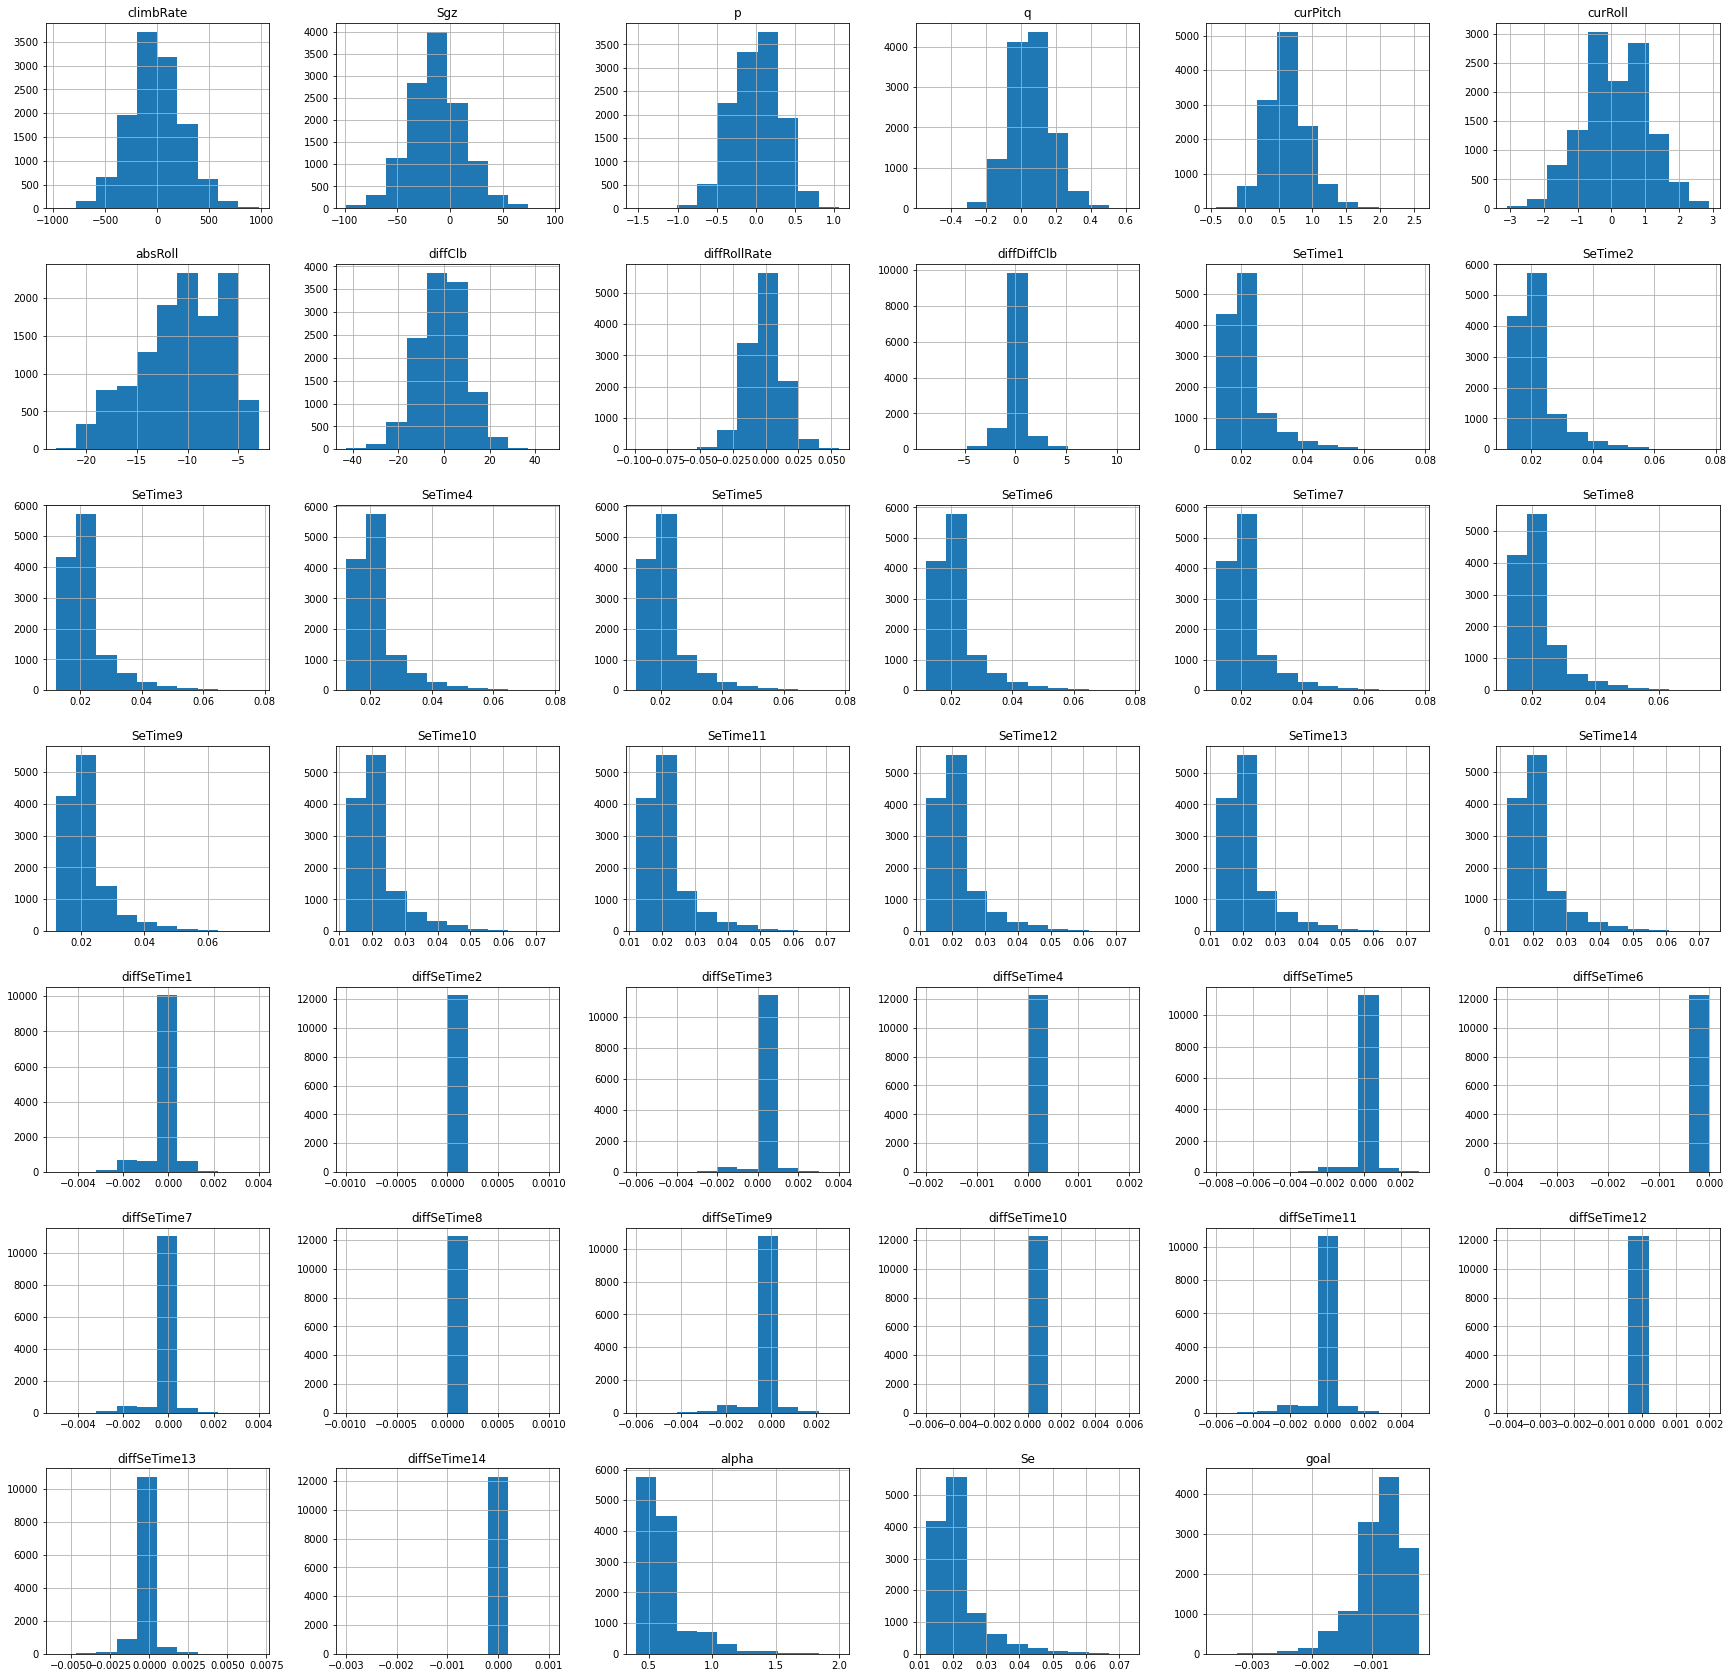

In [11]:
df.hist(figsize=(30,30))

Skew is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

In [12]:
df.skew()

climbRate        0.098209
Sgz              0.171683
p               -0.104076
q                0.122182
curPitch         0.626839
curRoll         -0.057179
absRoll         -0.449680
diffClb         -0.040951
diffRollRate    -0.138408
diffDiffClb      0.355559
SeTime1          2.464579
SeTime2          2.454791
SeTime3          2.454829
SeTime4          2.446358
SeTime5          2.446006
SeTime6          2.446032
SeTime7          2.445780
SeTime8          2.443360
SeTime9          2.443410
SeTime10         2.441531
SeTime11         2.441686
SeTime12         2.435539
SeTime13         2.435131
SeTime14         2.425071
diffSeTime1     -1.774092
diffSeTime2      0.000000
diffSeTime3     -3.362483
diffSeTime4     -6.984055
diffSeTime5     -3.659043
diffSeTime6    -71.708902
diffSeTime7     -2.880110
diffSeTime8      0.000000
diffSeTime9     -2.465652
diffSeTime10    -8.707955
diffSeTime11    -2.161947
diffSeTime12   -57.627550
diffSeTime13    -1.995704
diffSeTime14   -74.541126
alpha       

We use kurtosis which is the fourth central moment divided by the square of the variance

In [13]:
df.kurtosis()

climbRate          0.165619
Sgz                0.470034
p                 -0.307825
q                  0.637325
curPitch           1.489287
curRoll           -0.224441
absRoll           -0.602115
diffClb            0.385417
diffRollRate       0.964042
diffDiffClb        8.975018
SeTime1            7.805750
SeTime2            7.750984
SeTime3            7.751662
SeTime4            7.677529
SeTime5            7.676651
SeTime6            7.661184
SeTime7            7.658431
SeTime8            7.625961
SeTime9            7.626666
SeTime10           7.585859
SeTime11           7.585924
SeTime12           7.522619
SeTime13           7.518732
SeTime14           7.426183
diffSeTime1        7.387440
diffSeTime2     6124.500000
diffSeTime3       25.686054
diffSeTime4     4163.812009
diffSeTime5       26.317043
diffSeTime6     5662.042323
diffSeTime7       16.907003
diffSeTime8     6124.500000
diffSeTime9       12.590400
diffSeTime10    3890.185461
diffSeTime11      12.422107
diffSeTime12    4493

Standard Deviation

In [14]:
df.std()

climbRate       259.502687
Sgz              25.727234
p                 0.305488
q                 0.118447
curPitch          0.312061
curRoll           0.969050
absRoll           4.094653
diffClb          10.405533
diffRollRate      0.013352
diffDiffClb       1.121631
SeTime1           0.006828
SeTime2           0.006856
SeTime3           0.006856
SeTime4           0.006861
SeTime5           0.006861
SeTime6           0.006871
SeTime7           0.006871
SeTime8           0.006878
SeTime9           0.006878
SeTime10          0.006891
SeTime11          0.006892
SeTime12          0.006906
SeTime13          0.006907
SeTime14          0.006912
diffSeTime1       0.000696
diffSeTime2       0.000013
diffSeTime3       0.000452
diffSeTime4       0.000029
diffSeTime5       0.000482
diffSeTime6       0.000045
diffSeTime7       0.000562
diffSeTime8       0.000013
diffSeTime9       0.000621
diffSeTime10      0.000088
diffSeTime11      0.000644
diffSeTime12      0.000056
diffSeTime13      0.000617
d

Get object dict attributes

In [15]:
df.var()

climbRate       6.734164e+04
Sgz             6.618906e+02
p               9.332300e-02
q               1.402975e-02
curPitch        9.738206e-02
curRoll         9.390584e-01
absRoll         1.676618e+01
diffClb         1.082751e+02
diffRollRate    1.782742e-04
diffDiffClb     1.258057e+00
SeTime1         4.661629e-05
SeTime2         4.701127e-05
SeTime3         4.700856e-05
SeTime4         4.707930e-05
SeTime5         4.706897e-05
SeTime6         4.720590e-05
SeTime7         4.721653e-05
SeTime8         4.730614e-05
SeTime9         4.730359e-05
SeTime10        4.748963e-05
SeTime11        4.749684e-05
SeTime12        4.769390e-05
SeTime13        4.770096e-05
SeTime14        4.777377e-05
diffSeTime1     4.843852e-07
diffSeTime2     1.632786e-10
diffSeTime3     2.041368e-07
diffSeTime4     8.163665e-10
diffSeTime5     2.325956e-07
diffSeTime6     2.040443e-09
diffSeTime7     3.157761e-07
diffSeTime8     1.632786e-10
diffSeTime9     3.855310e-07
diffSeTime10    7.755409e-09
diffSeTime11  

Check Correlation between Columns 

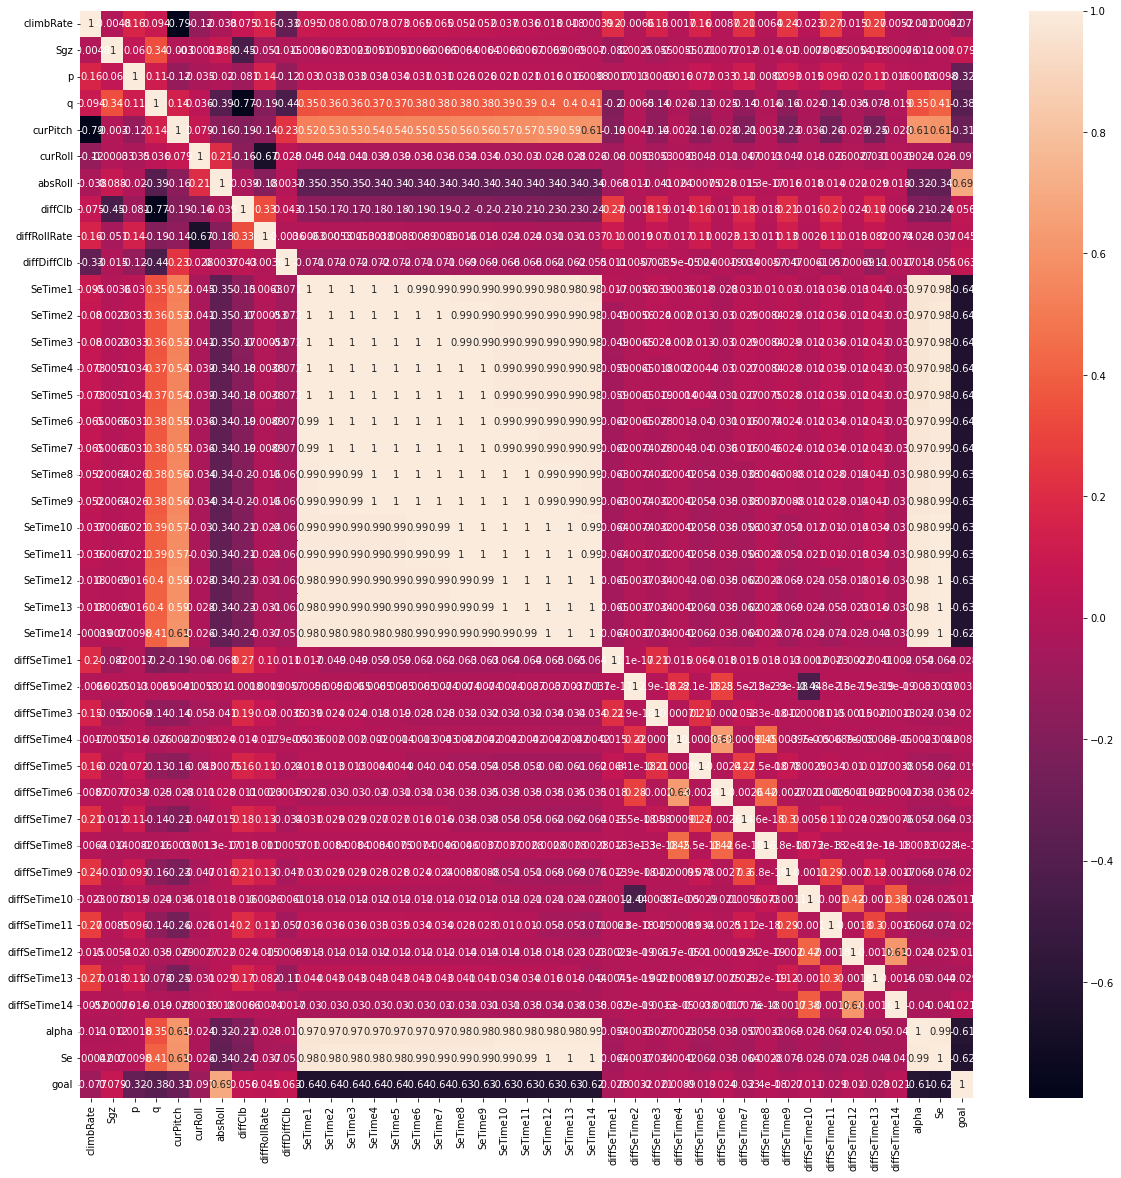

In [16]:
correlation = df.corr() 
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(correlation ,annot = True)

Create Plot

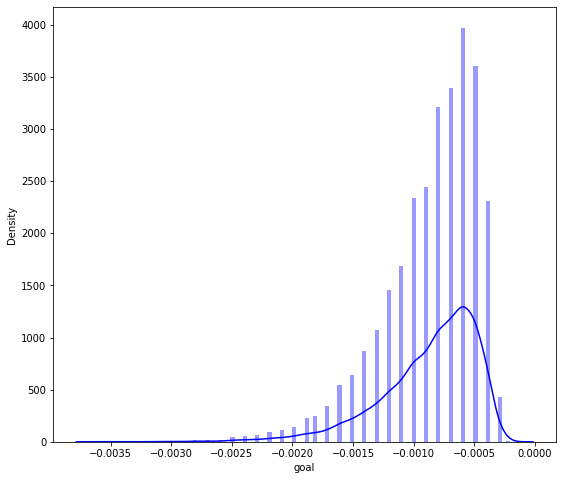

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

plt.figure(figsize=(9, 8))
sns.distplot(df['goal'], color='b', bins=100, hist_kws={'alpha': 0.4})

Linear Regression

In [18]:
X=df.loc[:,df.columns.drop("goal")].values
Y=df.loc[:,"goal"].values

Split dataset into train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Check the model's accuracy

In [20]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.817921280272922

Decision Tree Classifier

In [24]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value of DTR(Decision Tree Regression) is:",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE value of DTR(Decision Tree Regression) is: 0.00022413552751377356
0.6778250200508641


In [25]:
if (0.00017484724532543247)>(0.00017754194675383858):
    print("forest")

Random Forest Classifier

In [26]:
rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE value of RFS(Random Forest Regression) is:",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE value of RFS(Random Forest Regression) is: 0.00017886535809521814
0.7948257381510794


Ordinary least-squares (OLS)

In [27]:
res=sm.OLS(y_train,X_train).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.142
Method:                 Least Squares   F-statistic:                              43.52
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                   5.42e-297
Time:                        06:37:02   Log-Likelihood:                          54910.
No. Observations:                9800   AIC:                                 -1.097e+05
Df Residuals:                    9762   BIC:                                 -1.095e+05
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.075e-05   9.68e-05      0.318      0.751      -0.000       0.000
x2          6.264e-06   1.07e-05      0.587      0.557   -1.46e-05    2.72e-05
x3            -0.0001   9.59e-06    -13.588      0.000      -0.000      -0.000
x4         -3.839e-06   4.39e-05     -0.088      0.930   -8.98e-05    8.21e-05
x5          4.417e-05      0.000      0.359      0.720      -0.000       0.000
x6         -8.071e-05   1.25e-05     -6.468      0.000      -0.000   -5.63e-05
x7             0.0002    1.9e-05     12.272      0.000       0.000       0.000
x8         -3.833e-05   3.31e-05     -1.156      0.248      -0.000    2.66e-05
x9          3.567e-05   1.33e-05      2.689      0.007    9.67e-06    6.17e-05
x10        -7.982e-07   1.88e-05     -0.042      0.966   -3.77e-05    3.62e-05
x11            0.0002      0.000      0.555      0.579      -0.000       0.001
x12            0.0087      0.015      0.569      0.569      -0.021       0.039
x13           -0.0087      0.015     -0.572      0.567      -0.039       0.021
x14           -0.0028      0.010     -0.284      0.776      -0.022       0.016
x15            0.0025      0.010      0.259      0.796      -0.017       0.022
x16           -0.0012      0.005     -0.256      0.798      -0.011       0.008
x17            0.0014      0.005      0.287      0.774      -0.008       0.011
x18            0.0026      0.010      0.268      0.789      -0.016       0.022
x19           -0.0027      0.010     -0.275      0.783      -0.022       0.016
x20            0.0001      0.008      0.018      0.986      -0.015       0.015
x21           -0.0001      0.008     -0.016      0.987      -0.015       0.015
x22           -0.0008      0.011     -0.073      0.942      -0.022       0.021
x23            0.0008      0.011      0.074      0.941      -0.021       0.022
x24            0.0019      0.022      0.085      0.933      -0.041       0.045
x25         -1.41e-05   2.04e-05     -0.690      0.490   -5.42e-05     2.6e-05
x26        -1.351e-05   2.21e-05     -0.610      0.542   -5.69e-05    2.99e-05
x27         -4.25e-06   2.01e-05     -0.212      0.832   -4.36e-05    3.51e-05
x28         3.513e-06   2.21e-05      0.159      0.874   -3.99e-05    4.69e-05
x29         1.163e-06    1.9e-05      0.061      0.951   -3.61e-05    3.84e-05
x30         1.283e-05   3.73e-05      0.344      0.731   -6.03e-05     8.6e-05
x31        -1.043e-05   1.97e-05     -0.530      0.596    -4.9e-05    2.82e-05
x32         -3.29e-06   1.37e-05     -0.240      0.810   -3.01e-05    2.35e-05
x33        -8.756e-06   2.11e-05     -0.414      0.679   -5.02e-05    3.27e-05
x34         -1.01e-06   8.64e-05     -0.012      0.991      -0.000       0.000
x35        -7.383e-07   2.13e-05     -0.035      0.972   -4.2